In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') #Supress unnecessary warnings for readability and cleaner presentation

In [2]:
datadir = '/data/zillow/'

# train_2016.csv

In [3]:
train = pd.read_csv(datadir + "train_2016.csv", parse_dates=["transactiondate"])
train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [4]:
train.shape

(90811, 3)

### parcelid

In [5]:
train.parcelid.value_counts().reset_index().parcelid.value_counts()

1    90554
2      127
3        1
Name: parcelid, dtype: int64

Most of the parcelid are appearing only once.

### logerror

logerror: log(Zestimate) - log(Saleprice)

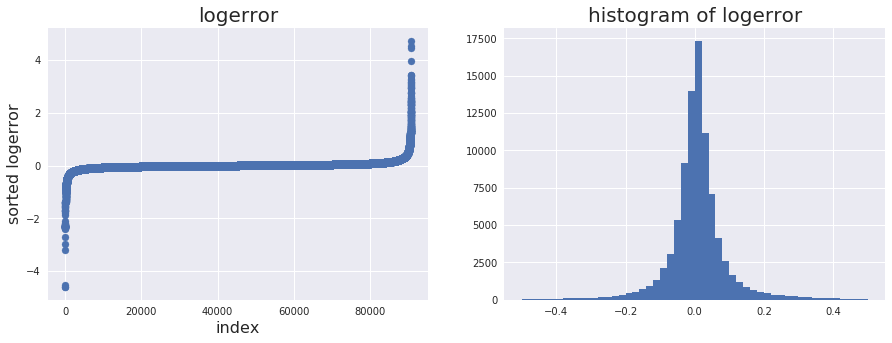

In [6]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(range(len(train)),train.logerror.sort_values())
plt.xlabel('index', fontsize = 16 )
plt.ylabel('sorted logerror', fontsize = 16)
plt.title('logerror', fontsize = 20)
plt.subplot(1,2,2)
train.logerror.hist(bins = 50, range=[-0.5,0.5])
plt.title("histogram of logerror", fontsize =20)
plt.show()

In [7]:
train['month'] = train['transactiondate'].dt.month
train['year'] = train['transactiondate'].dt.year
train['yearmonth'] = train['year']*100+train['month']

train_month = train.groupby('yearmonth').agg({'parcelid':'count', 'logerror':'mean'}).reset_index()
train_month.rename(columns={'parcelid':"count"}, inplace = True)
train_month.head()

,yearmonth,count,logerror
0,201601,6574,0.015516
1,201602,6401,0.014667
2,201603,8752,0.008847
3,201604,9407,0.005222
4,201605,10056,0.005864


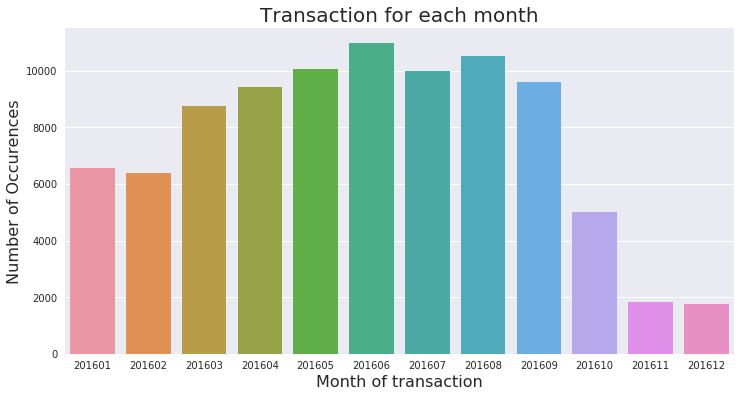

In [8]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'yearmonth', y='count', data = train_month)
plt.xlabel("Month of transaction", fontsize =16)
plt.ylabel("Number of Occurences", fontsize = 16)
plt.title ("Transaction for each month", fontsize = 20)
plt.show()

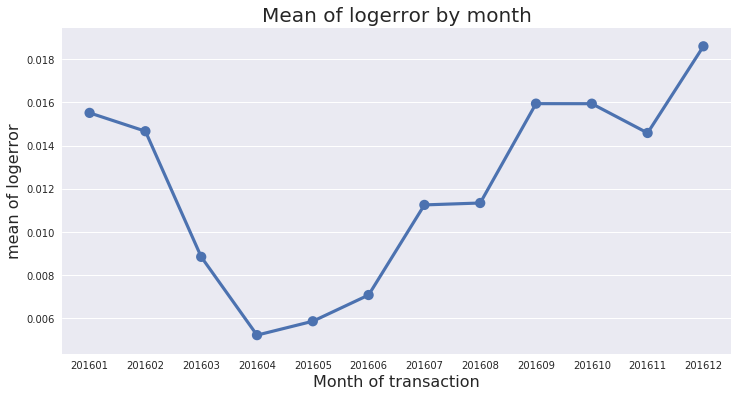

In [9]:
plt.figure(figsize = (12,6))
sns.pointplot(x = 'yearmonth', y='logerror', data = train_month)
plt.xlabel("Month of transaction", fontsize =16)
plt.ylabel("mean of logerror", fontsize = 16)
plt.title("Mean of logerror by month", fontsize = 20)
plt.show()

# properties_2016.csv

In [10]:
prop = pd.read_csv(datadir + "properties_2016.csv")
prop.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [11]:
prop.shape

(2985217, 58)

### Missing values 

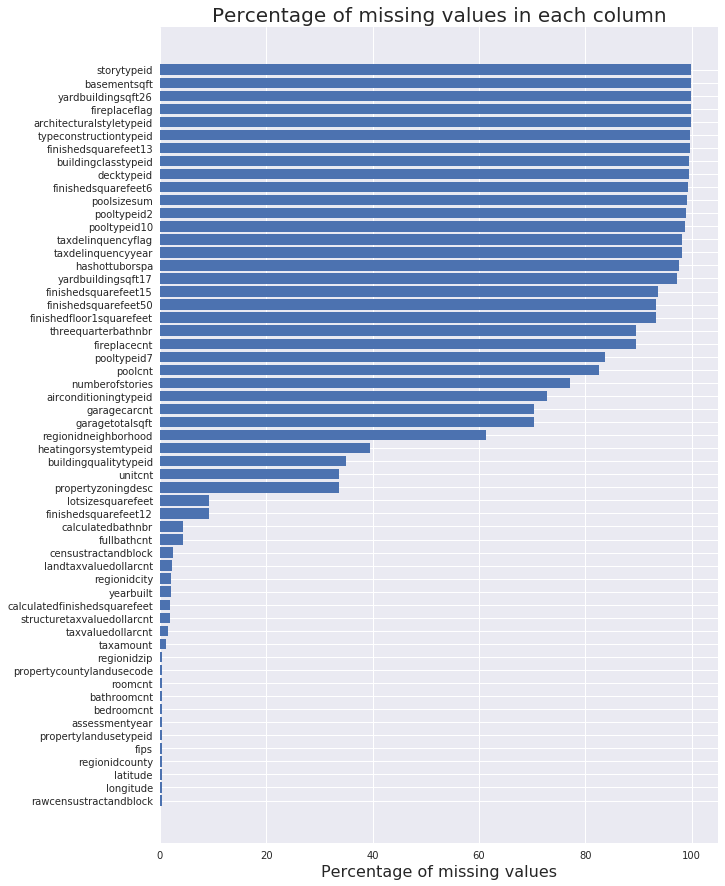

In [12]:
nan_df = pd.DataFrame(columns=['colname', 'cnt'])
nan_df['colname'] =  prop.columns[prop.isnull().any()].tolist() 
nan_df['cnt'] = nan_df.colname.apply( lambda x : prop[x].isnull().sum(axis=0)/len(prop)*100)
nan_df.sort_values(by='cnt', inplace = True)
f, ax = plt.subplots(figsize= (10,15))
idx = range(len(nan_df))
ax.barh( idx , nan_df.cnt.values )
ax.set_yticks(idx)
ax.set_yticklabels(nan_df.colname.values)
ax.set_title('Percentage of missing values in each column', fontsize = 20)
ax.set_xlabel("Percentage of missing values", fontsize = 16)
plt.show()

### Data Types

In [13]:
dtype_df = prop.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,52
2,object,5


### Latitude and Longitude

Three counties: Los Angeles, Orange and Ventura, California

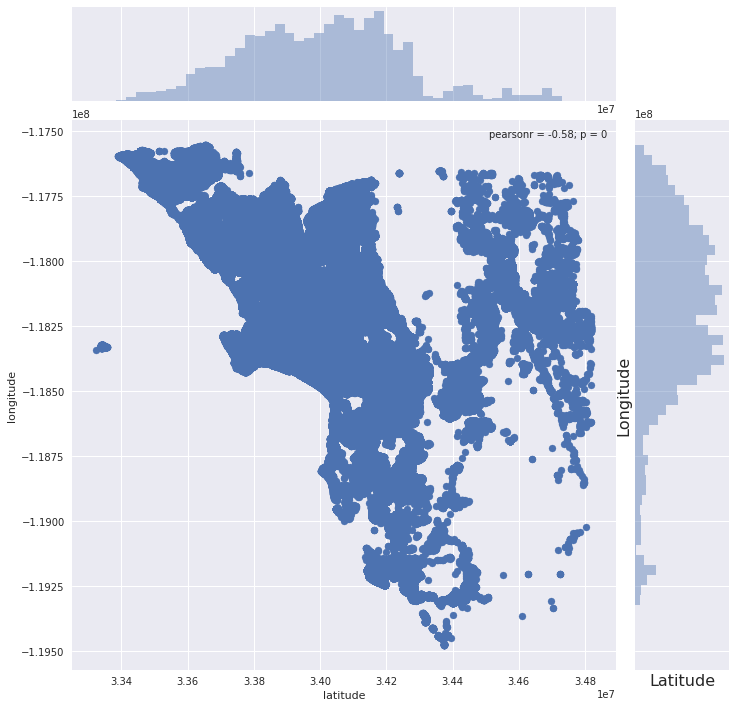

In [14]:
plt.figure(figsize=(12,12))
sns.jointplot(x='latitude', y= 'longitude',data = prop, size=10)
plt.ylabel('Longitude', fontsize=16)
plt.xlabel('Latitude', fontsize=16)
plt.show()

### Merge two files:

In [15]:
train = pd.merge(train, prop, on = 'parcelid', how = 'left')
train.head()

,parcelid,logerror,transactiondate,month,year,yearmonth,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,2016,201601,1.0,NaN,NaN,2.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,2016,201601,NaN,NaN,NaN,3.5,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,2016,201601,1.0,NaN,NaN,3.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,2016,201601,1.0,NaN,NaN,2.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,2016,201601,NaN,NaN,NaN,2.5,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


### Correlation with logerror

In [16]:
cols = dtype_df.ix[(dtype_df['Column Type'] =='int64') | (dtype_df['Column Type'] =='float64')]['Count']
corr_df = train[cols].corrwith(train.logerror).reset_index()
corr_df.columns = ['feat','correlation']
corr_df.sort_values(by='correlation', ascending = False, inplace = True)

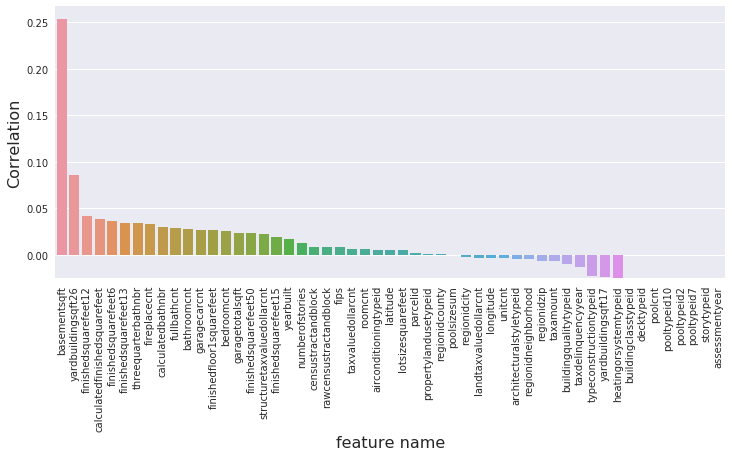

In [17]:
plt.figure(figsize=(12,5))
sns.barplot(x='feat', y='correlation', data = corr_df)
plt.xticks(rotation= 90)
plt.xlabel('feature name', fontsize = 16)
plt.ylabel('Correlation', fontsize = 16)
plt.show()

#### Columns with NAN correlations 

In [18]:
nanfeats = corr_df.ix[corr_df.correlation.isnull()].feat
for col in nanfeats:
    print(col, train[col].nunique())

buildingclasstypeid 1
decktypeid 1
poolcnt 1
pooltypeid10 1
pooltypeid2 1
pooltypeid7 1
storytypeid 1
assessmentyear 1


All these columns have only 1 value, hence no correlation value.

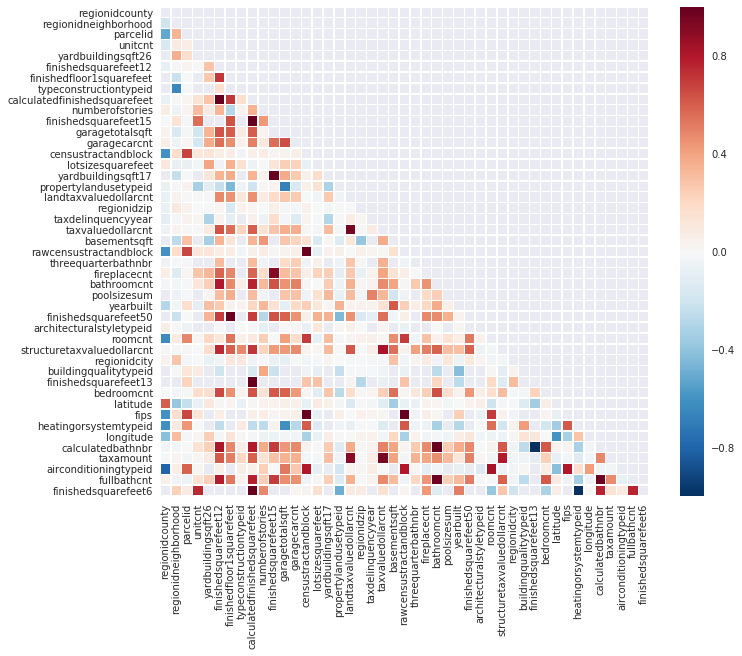

In [19]:
selected = list(set(cols)-set(nanfeats))
corr_mat = train[selected].corr()

mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(11, 9))


sns.heatmap(corr_mat, mask=mask, 
            square=True,
            linewidths=.5)
plt.show()

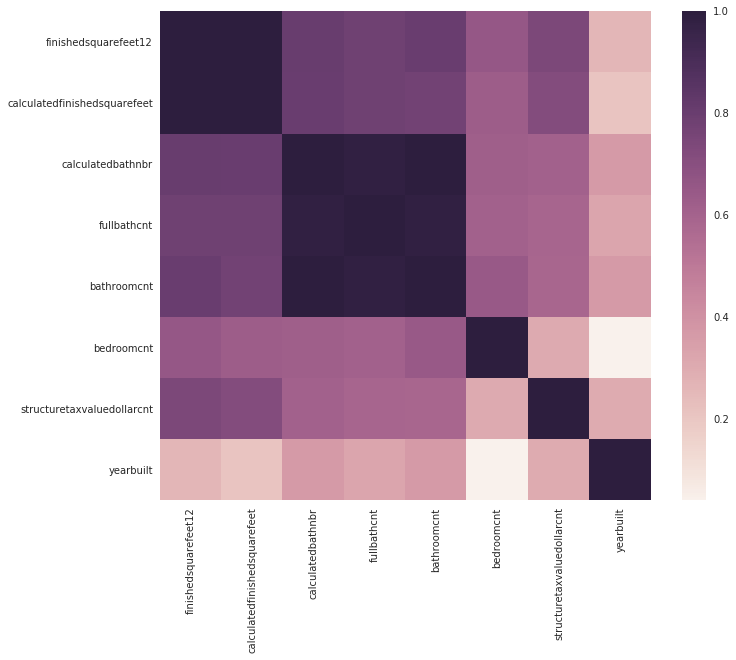

In [20]:
corr_df = pd.merge(corr_df, nan_df, left_on = "feat", right_on = 'colname', how='left')
corr_df.drop(['colname'], axis=1, inplace=True)
corr_df.rename(columns={'cnt':'nan_ratio'}, inplace = True)

# Columns with higher correlation (with logerror) and less missing values

highcor = corr_df.ix[(np.abs(corr_df.correlation)>0.01) & (corr_df.nan_ratio<10)].feat

plt.figure(figsize=(11, 9))
sns.heatmap(corr_mat.ix[highcor, highcor])
plt.show()

Columns with higher correlation (with logerror) and less missing values, are highly correlated.

### Finished square feet 12

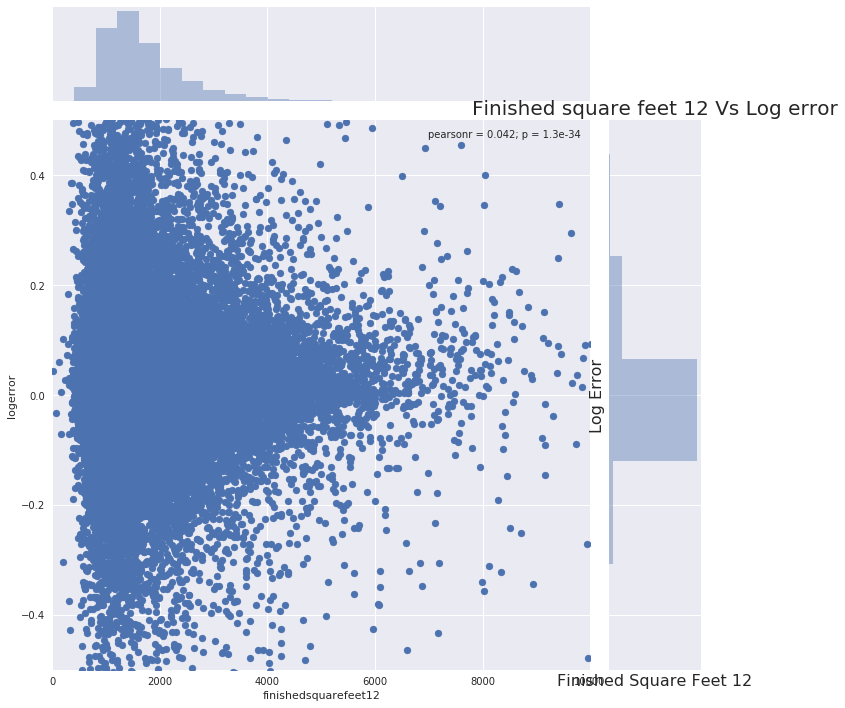

In [21]:
sns.jointplot(x='finishedsquarefeet12', y='logerror',data = train,   size=10, xlim=(0,10000), ylim=(-0.5,0.5))
plt.ylabel('Log Error', fontsize=16)
plt.xlabel('Finished Square Feet 12', fontsize=16)
plt.title("Finished square feet 12 Vs Log error", fontsize=20)
plt.show()

### Bathroom Count

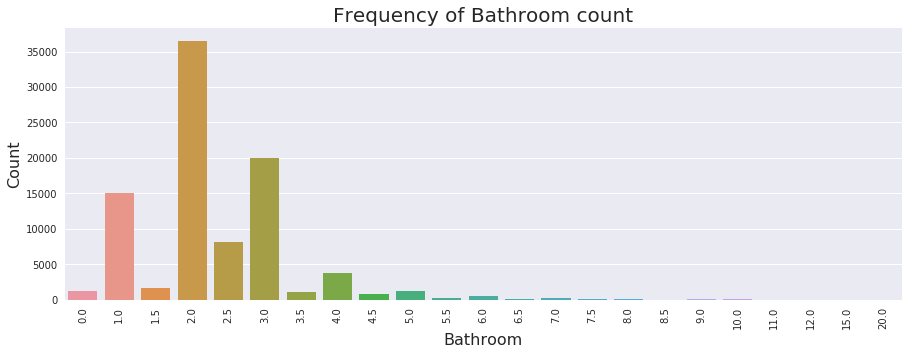

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(x="bathroomcnt", data=train)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Bathroom', fontsize=16)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bathroom count", fontsize=20)
plt.show()

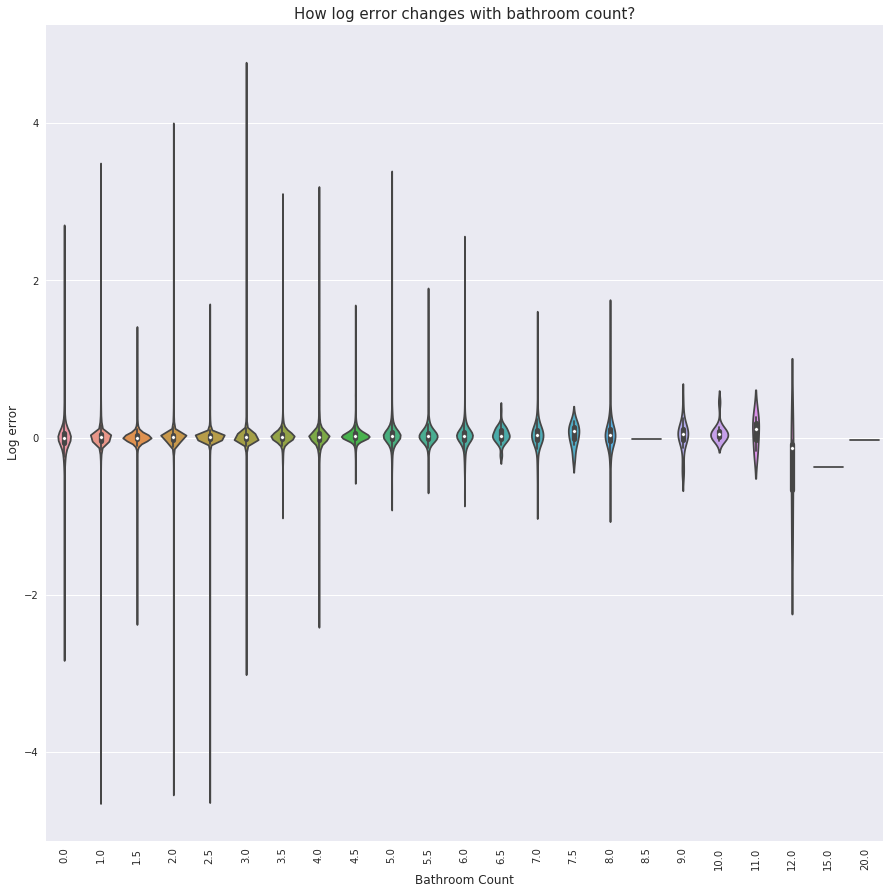

In [23]:
plt.figure(figsize=(15,15))
sns.violinplot(x="bathroomcnt", y="logerror", data=train)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('Bathroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("How log error changes with bathroom count?", fontsize=15)
plt.show()

#### Bedroom count

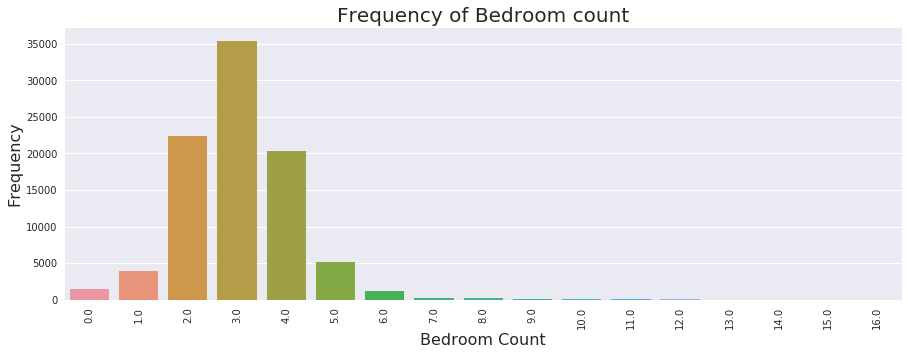

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(x="bedroomcnt", data=train)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Bedroom Count', fontsize=16)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=20)
plt.show()

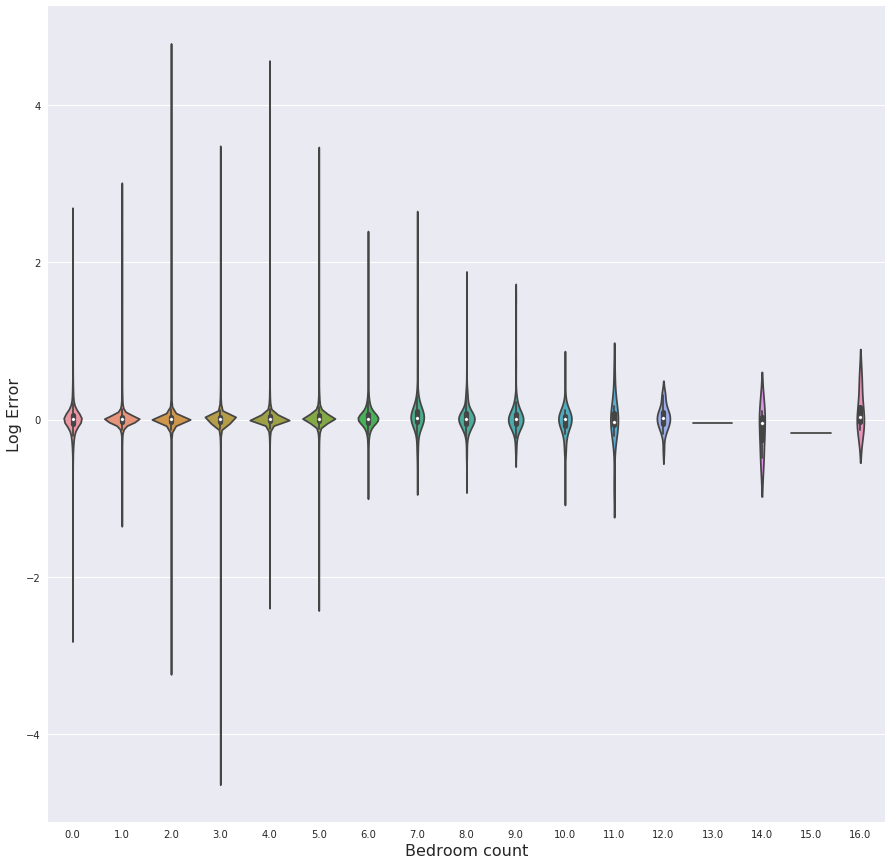

In [25]:
plt.figure(figsize=(15,15))
sns.violinplot(x='bedroomcnt', y='logerror', data=train)
plt.xlabel('Bedroom count', fontsize=16)
plt.ylabel('Log Error', fontsize=16)
plt.show()

### YearBuilt:

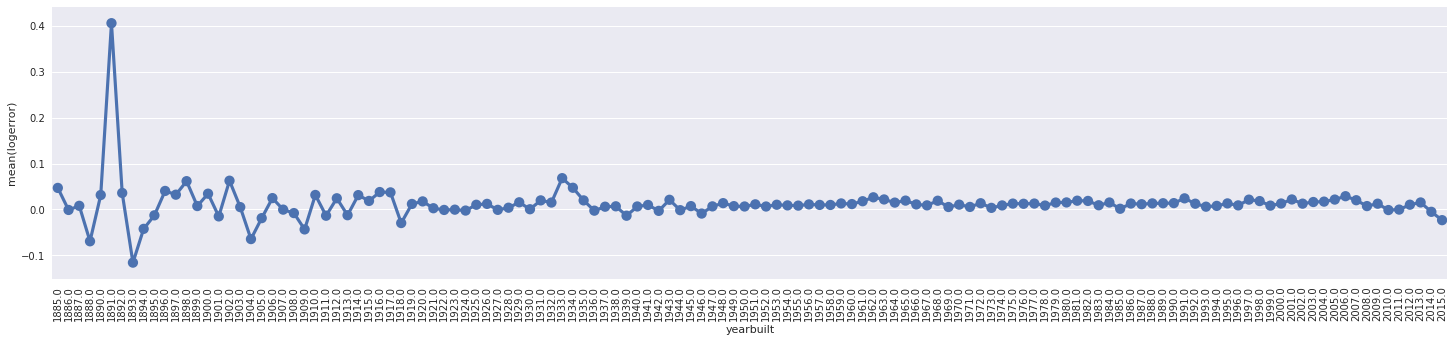

In [26]:
grouped = train.groupby('yearbuilt').logerror.mean().reset_index()
plt.figure(figsize=(25,5))
sns.pointplot(x='yearbuilt', y='logerror', data=grouped)
plt.xticks(rotation=90)
plt.show()